# Процесс сбора датасета

* Видео-ролики разбили на кадры.
* Кадры в цикле подавались на наш алгоритм, сделанный на основе LangSAM.
* На каждом кадре наш алгоритм разметил объекты ограничивающими рамками, затем в пределах каждой ограничивающей рамки алгоритм выделял маску объекта, которую преобразовал в полигон. Координаты точек полигона разместились в txt-файле (аннотация в формате YOLOv8).
* В итоге получилось две папки images c кадрами и labels с соответствующими этим кадрам аннотациями (txt файлы с координатами полигонов для каждого объекта)



In [ ]:
#@title Библиотеки
!pip install torch torchvision
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

from lang_sam import LangSAM
from IPython.display import display, Image
from PIL import Image as ImagePIL
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import os, zipfile
from pathlib import Path
import copy
import random
from pathlib import Path
from IPython.display import clear_output
from tqdm import tqdm
import gc

model = LangSAM()


# sidewalk

!wget -q https://narodfm.ru/images/novosti/medium/cb10d9f5d6a57f582b37706624029ba4.jpg -O sidewalk_1.jpg
sidewalk_1_path = '/content/sidewalk_1.jpg'

!wget -q https://img3.teletype.in/files/2f/12/2f1297cb-bd1d-48b4-940d-5ae47ebbe3b3.jpeg -O sidewalk_2.jpg
sidewalk_2_path = '/content/sidewalk_2.jpg'

!wget -q https://vr-vyksa.ru/media/images/DSC_0797_RuFxVFe.width-1600.watermark-lb-10x10-0.6.jpg -O sidewalk_3.jpg
sidewalk_3_path = '/content/sidewalk_3.jpg'

!wget -q https://upload.wikimedia.org/wikipedia/commons/6/60/Sidewalk_with_bike_path.JPG -O sidewalk_4.jpg
sidewalk_4_path = '/content/sidewalk_4.jpg'

!wget -q https://st1.stpulscen.ru/images/product/040/380/958_medium2.jpg -O sidewalk_5.jpg
sidewalk_5_path = '/content/sidewalk_5.jpg'

# crosswalk

!wget -q https://www.shadr.info/news/2020/05/03/17023-img-ylo5kh-680x453.jpg -O crosswalk_1.jpg
crosswalk_1_path = '/content/crosswalk_1.jpg'

!wget -q https://s0.rbk.ru/v6_top_pics/media/img/2/17/756368150320172.jpg -O crosswalk_2.jpg
crosswalk_2_path = '/content/crosswalk_2.jpg'

!wget -q https://www.avtovzglyad.ru/media/article/0_Hv9w5tB.jpg.740x555_q85_box-0%2C0%2C980%2C735_crop_detail_upscale.jpg -O crosswalk_3.jpg
crosswalk_3_path = '/content/crosswalk_3.jpg'

!wget -q https://vlpravda.ru/wp-content/uploads/2022/04/99_full-735x400.jpg -O crosswalk_4.jpg
crosswalk_4_path = '/content/crosswalk_4.jpg'

# person

!wget -q https://s0.rbk.ru/v6_top_pics/media/img/1/66/756401567970661.jpg -O person_1.jpg
person_1_path = '/content/person_1.jpg'

!wget -q https://ss.sport-express.ru/userfiles/materials/169/1696394/volga.jpg -O person_2.jpg
person_2_path = '/content/person_2.jpg'

!wget -q https://admnvrsk.ru/upload/resize_cache/iblock/47b/865_497_2/euyeqnevrqlv01177vxvbzk2kxco87ee.jpg -O person_3.jpg
person_3_path = '/content/person_3.jpg'

!wget -q https://riamo.ru/files/image/04/63/76/gallery!6n7.png -O person_4.jpg
person_4_path = '/content/person_4.jpg'

# car

!wget -q https://sanantonioreport.org/wp-content/uploads/2022/03/nickwagner-pedestrians-sidewalk-san-pedro-ave-09MAR22-2.jpg -O car_1.jpg
car_1_path = '/content/car_1.jpg'

!wget -q https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iPrDvyGApPiI/v1/1200x1202.jpg -O car_2.jpg
car_2_path = '/content/car_2.jpg'

!wget -q https://newyorkparkingticket.com/wp-content/uploads/2019/12/Myrna-NYC-sidewalk-parking-ticket2.jpeg -O car_3.jpg
car_3_path = '/content/car_3.jpg'

!wget -q https://nacto.org/wp-content/themes/sink_nacto/views/design-guides/retrofit/urban-street-design-guide/images/sidewalks/carousel//retail-sidewalk.jpg -O car_4.jpg
car_4_path = '/content/car_4.jpg'

# bus_stop

!wget -q https://test.merdi.ru/upload/userfiles/22092020/images/f154836a13f1d413ed1d81bc1e43cc46.jpg -O bus_stop_1.jpg
bus_stop_1_path = '/content/bus_stop_1.jpg'

!wget -q https://static.tildacdn.com/tild3162-6635-4530-a438-663462613038/atw1e8ej6ee.jpg -O bus_stop_2.jpg
bus_stop_2_path = '/content/bus_stop_2.jpg'

!wget -q https://i.ytimg.com/vi/8ebqyFMxVE4/maxresdefault.jpg -O bus_stop_3.jpg
bus_stop_3_path = '/content/bus_stop_3.jpg'

!wget -q https://www.oknamedia.ru/system/uploads/photo/photo/484/48415/wallpaper_Screenshot_1.jpg -O bus_stop_4.jpg
bus_stop_4_path = '/content/bus_stop_4.jpg'

# bus

!wget -q https://upload.wikimedia.org/wikipedia/commons/0/03/LiAZ-5292_Ryazan.jpg -O bus_1.jpg
bus_1_path = '/content/bus_1.jpg'

!wget -q https://arbuztoday.ru/wp-content/uploads/2022/12/2022-12-18-12-12-34.jpg -O bus_2.jpg
bus_2_path = '/content/bus_2.jpg'

!wget -q https://msknovosti.ru/wp-content/uploads/2021/11/img_0768-870x400.jpg -O bus_3.jpg
bus_3_path = '/content/bus_3.jpg'

!wget -q https://cdn.iportal.ru/news/2015/99/preview/aa9ea7e236411206416b005445248d8b08b363e3_2048_1365_c.jpg -O bus_4.jpg
bus_4_path = '/content/bus_4.jpg'

# urn

!wget -q https://riamo.ru/files/image/14/95/61/-gallery!0d4n.jpeg -O urn_1.jpg
urn_1_path = '/content/urn_1.jpg'

!wget -q https://gorodmaf.ru/wp-content/uploads/2023/06/zhhzhzhzhz.jpg -O urn_2.jpg
urn_2_path = '/content/urn_2.jpg'

!wget -q https://hozotdel.ru/wa-data/public/shop/products/07/48/4807/images/19798/19798.970.jpg -O urn_3.jpg
urn_3_path = '/content/urn_3.jpg'

!wget -q https://italianet23.ru/wp-content/uploads/2020/10/urna-dlya-musora-kil-04.jpg -O urn_4.jpg
urn_4_path = '/content/urn_4.jpg'

!wget -q https://adanatgroup.ru/image/cache/catalog/category/urni/urna-istoricheskaya-02-800x600-product_popup.jpg -O urn_5.jpg
urn_5_path = '/content/urn_5.jpg'

!wget -q https://gorod48.ru/upload/iblock/47f/47f1ab5eaceffa7249ca12cce4e3943b.jpg -O urn_6.jpg
urn_6_path = '/content/urn_6.jpg'

!wget -q https://www.omskinform.ru/images/1_ostanovka1.jpg -O urn_7.jpg
urn_7_path = '/content/urn_7.jpg'

# pothole

!wget -q http://www.razruha.org/data/media/55/1497131081e8b.jpg -O pothole_1.jpg
pothole_1_path = '/content/pothole_1.jpg'

!wget -q http://www.razruha.org/data/media/55/16607260462f8.jpg -O pothole_2.jpg
pothole_2_path = '/content/pothole_2.jpg'

!wget -q https://24.kg/files/media/267/267981.JPG -O pothole_3.jpg
pothole_3_path = '/content/pothole_3.jpg'

!wget -q https://pravdapfo.ru/sites/default/files/0_83411_a35b8b06_xl.jpg -O pothole_4.jpg
pothole_4_path = '/content/pothole_4.jpg'

# address_plate

!wget -q https://ugra.ru/pics-newtambov.ru/storage/taisia/2016/02/IMG_7050.jpg -O address_plate_1.jpg
address_plate_1_path = '/content/address_plate_1.jpg'

!wget -q https://foto.cheb.ru/foto/foto.cheb.ru-254664.jpg -O address_plate_2.jpg
address_plate_2_path = '/content/address_plate_2.jpg'

!wget -q https://upload.cheb.ru/uploads/397716/PkB61tY5ciN2F8f4y2yX8A==/fullview/img_8943.jpg -O address_plate_3.jpg
address_plate_3_path = '/content/address_plate_3.jpg'

!wget -q https://foto.cheb.ru/foto/foto.cheb.ru-252159.jpg -O address_plate_4.jpg
address_plate_4_path = '/content/address_plate_4.jpg'

os.mkdir('/content/bbox_labels_dir')
os.mkdir('/content/seg_labels_dir')

classes_names_dict = {0: 'тротуар',
                      1: 'пешеходный переход',
                      2: 'автомобиль',
                      3: 'человек',
                      4: 'автобусная остановка',
                      5: 'автобус',
                      6: 'скамейка',
                      7: 'мусорный бак',
                      8: 'выбоина',
                      9: 'адресная табличка'}

classes_phrases = [['sidewalk'], ['crosswalk'], ['car'], ['person'], ['bus stop'], ['bus'], ['bench'], ['trash can'], ['pothole'], ['address plate']]

text_prompt = 'sidewalk.crosswalk.car.person.bus stop.bus.bench.trash can.pothole.address plate'

classes_colors_list = [np.concatenate([np.random.random(3), np.array([0.6])], axis=0) for _ in range(len(classes_names_dict))]



classes_colors_list = [np.array([1.0, 0.0, 0.0, 0.6]),
    np.array([0.0, 1.0, 0.0, 0.6]),
    np.array([1.0, 1.0, 0.0, 0.6]),
    np.array([0.5, 0.0, 0.5, 0.6]),
    np.array([0.0, 0.0, 1.0, 0.6]),
    np.array([0.0, 1.0, 1.0, 0.6]),
    np.array([1.0, 0.0, 1.0, 0.6]),
    np.array([0.8, 0.0, 0.4, 0.6]),
    np.array([0.6, 0.4, 0.2, 0.6]),
    np.array([0.0, 0.5, 1.0, 0.6])]


print(classes_colors_list)

bboxes_labels_target_dir = '/content/bbox_labels_dir'

seg_labels_target_dir = '/content/seg_labels_dir'

images_extensions_list = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']



def load_dataset(url):

    output = "archive.zip"

    # Проверяем, существует ли архив archive.zip
    if os.path.exists(output):
        # Если архив существует, удаляем его
        os.remove(output)

    # Скачиваем zip архив
    gdown.download(url, output, quiet=False)

    # Распаковываем архив в текущую директорию
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall()

    print("\n Датасет загружен!")


def auto_get_yolo_bbox_seg(image_path, classes_names_dict, classes_phrases, text_prompt, classes_colors_list, bboxes_labels_target_dir, seg_labels_target_dir, random_colors=False, show_results=True):

    def get_class_index(phrase):
        for idx, class_phrases in enumerate(classes_phrases):
            if phrase in ' '.join(class_phrases):
                class_index = idx
                return class_index

    def convert_labels(x1, y1, x2, y2, image_size):

        def sorting(l1, l2):
            if l1 > l2:
                lmax, lmin = l1, l2
                return lmax, lmin
            else:
                lmax, lmin = l2, l1
                return lmax, lmin

        xmax, xmin = sorting(x1, x2)
        ymax, ymin = sorting(y1, y2)
        dw = 1./image_size[0]
        dh = 1./image_size[1]
        x = (xmin + xmax)/2.0
        y = (ymin + ymax)/2.0
        w = xmax - xmin
        h = ymax - ymin
        x = x*dw
        w = w*dw
        y = y*dh
        h = h*dh

        return (x, y, w, h)


    def display_results(image, classes_names, masks, bboxes_lines, seg_lines, classes_colors=None, random_colors=True):

        if (not classes_colors) and random_colors:
            classes_colors = [np.concatenate([np.random.random(3), np.array([0.6])], axis=0) for _ in range(len(classes_names_dict))]
        if (not classes_colors) and (not random_colors):
            classes_colors = [np.array([30/255, 144/255, 255/255, 0.6]) for _ in range(len(classes_names_dict))]

        def show_mask(mask, ax, color):
            h, w = mask.shape[-2:]
            mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
            ax.imshow(mask_image)

        def plot_one_yolo_bbox(bbox_coords, image, color, label=None, line_thickness=None):

            '''
            Отрисовывает один ббокс на поданном изображении
            '''

            tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
            color = color*255
            c1, c2 = (int(bbox_coords[0]), int(bbox_coords[1])), (int(bbox_coords[2]), int(bbox_coords[3]))
            cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
            if label:
                tf = max(tl - 4, 1)  # font thickness
                t_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX, fontScale=tl / 5, thickness=tf)[0]
                c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
                cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
                cv2.putText(image, label, (c1[0], c1[1] - 2), cv2.FONT_HERSHEY_COMPLEX, tl / 5, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

        def plot_one_seg_polyline(polyline, image, color, line_thickness=None):

            '''
            Отрисовывает одну полилинию на поданном изображении
            '''

            tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1
            color = color*255
            cv2.polylines(image, [polyline.astype('int')], True, color, thickness=tl, lineType=cv2.LINE_AA)



        plt.figure(figsize=(48, 16))
        source_img_ax, bboxed_img_ax, segmented_img_ax, polylined_img_ax = plt.subplot(1, 4, 1), plt.subplot(1, 4, 2), plt.subplot(1, 4, 3), plt.subplot(1, 4, 4)

        source_img_ax.set_title('Исходное изображение')
        source_img_ax.axis('off')
        source_img_ax.imshow(image)

        for mask, color in zip(masks, classes_colors):
            show_mask(mask, segmented_img_ax, color=color)

        height, width, channels = image.shape

        bboxed_image = copy.copy(image)
        for line, color, class_name in zip(bboxes_lines, classes_colors, classes_names):
            bbox_coords = line.split()[1:]

            x_center, y_center, w, h = float(bbox_coords[0])*width, float(bbox_coords[1])*height, float(bbox_coords[2])*width, float(bbox_coords[3])*height
            x1 = round(x_center-w/2)
            y1 = round(y_center-h/2)
            x2 = round(x_center+w/2)
            y2 = round(y_center+h/2)

            plot_one_yolo_bbox([x1, y1, x2, y2], bboxed_image, color=color[:3], label=class_name, line_thickness=3)

        bboxed_img_ax.set_title('Ббоксы в формате Yolo')
        bboxed_img_ax.axis('off')
        bboxed_img_ax.imshow(bboxed_image)

        segmented_img_ax.set_title('Сегментированное изображение')
        segmented_img_ax.axis('off')
        segmented_img_ax.imshow(image)

        for mask, color in zip(masks, classes_colors):
            show_mask(mask, segmented_img_ax, color=color)

        height, width, channels = image.shape


        polylined_image = copy.copy(image)
        for line, color in zip(seg_lines, classes_colors):
            class_index, *polyline = line.split(' ')
            polyline = np.asarray(polyline, dtype=np.float16).reshape(-1, 2)*np.array([width, height])

            plot_one_seg_polyline(polyline, polylined_image, color=color[:3], line_thickness=3)

        polylined_img_ax.set_title('Полигоны сегментации в формате Yolo')
        polylined_img_ax.axis('off')
        polylined_img_ax.imshow(polylined_image)

    image_PIL = ImagePIL.open(image_path).convert("RGB")
    masks, bboxes, phrases, logits = model.predict(image_PIL, text_prompt)

    bboxes_labels_target_dir = Path(bboxes_labels_target_dir)
    seg_labels_target_dir = Path(seg_labels_target_dir)

    file_name_wo_ext = os.path.splitext((os.path.split(image_path)[1]))[0]
    labels_file_name = file_name_wo_ext + '.txt'

    with open(bboxes_labels_target_dir/labels_file_name, 'w') as yolo_bboxes_labels_file:
        bboxes_lines = []
        for bbox, phrase in zip(bboxes.tolist(), phrases):
            x, y, w, h = convert_labels(*bbox, image_PIL.size)
            bbox_line = f'{get_class_index(phrase)} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n'
            yolo_bboxes_labels_file.write(bbox_line)
            bboxes_lines.append(bbox_line)

    with open(seg_labels_target_dir/labels_file_name, 'w') as yolo_seg_labels_file:
        polylines_lines = []
        for mask, phrase in zip(masks, phrases):
            binary_mask = mask.cpu().numpy().astype(np.uint8)
            contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            largest_contour = max(contours, key=cv2.contourArea)
            yolo_mask = largest_contour.flatten().reshape(-1,2)
            yolo_mask_norm = yolo_mask / np.array([image_PIL.size[0], image_PIL.size[1]])
            polyline_line = f'{get_class_index(phrase)} {" ".join(map(str, yolo_mask_norm.reshape(-1)))}\n'
            yolo_seg_labels_file.write(polyline_line)
            polylines_lines.append(polyline_line)

    if show_results:

        classes_names = [classes_names_dict[get_class_index(phrase)] for phrase in phrases]
        classes_colors = [classes_colors_list[get_class_index(phrase)] for phrase in phrases]

        #clear_output(wait=True)
        image_bgr = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        display_results(image_rgb, classes_names, masks, bboxes_lines, polylines_lines, classes_colors=classes_colors, random_colors=random_colors)

def bbox_seg_poligon_txt(image_path):
    auto_get_yolo_bbox_seg(image_path,
                               classes_names_dict,
                               classes_phrases,
                               text_prompt,
                               classes_colors_list,
                               bboxes_labels_target_dir,
                               seg_labels_target_dir,
                               random_colors=False,
                               show_results=True)

def txt_print(image_path):
    filename2 = os.path.splitext(os.path.basename(image_path))[0]

    with open('/content/seg_labels_dir/' + filename2 + '.txt', 'r') as file:
        content = file.read()
        print("Аннотация в формате YOLO для полигонов:\n", content)


  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-vlikp73s
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-vlikp73s
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 134a48a81ebd691686187ecce2d016fb327a8852
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-adnd63xg/groundingdino_005e331f67e84760a7c37d61e48593bf
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-adnd63xg/groundingdino_005e331f67e84760a7c37d61e48593bf
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 60d796825e1266e56f7e4e9e00e88de662b67bd3
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:11<00:00, 221MB/s]


[array([1. , 0. , 0. , 0.6]), array([0. , 1. , 0. , 0.6]), array([1. , 1. , 0. , 0.6]), array([0.5, 0. , 0.5, 0.6]), array([0. , 0. , 1. , 0.6]), array([0. , 1. , 1. , 0.6]), array([1. , 0. , 1. , 0.6]), array([0.8, 0. , 0.4, 0.6]), array([0.6, 0.4, 0.2, 0.6]), array([0. , 0.5, 1. , 0.6])]


# Разметка алгоритмом на основе LangSAM

## На одном кадре несколько классов

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


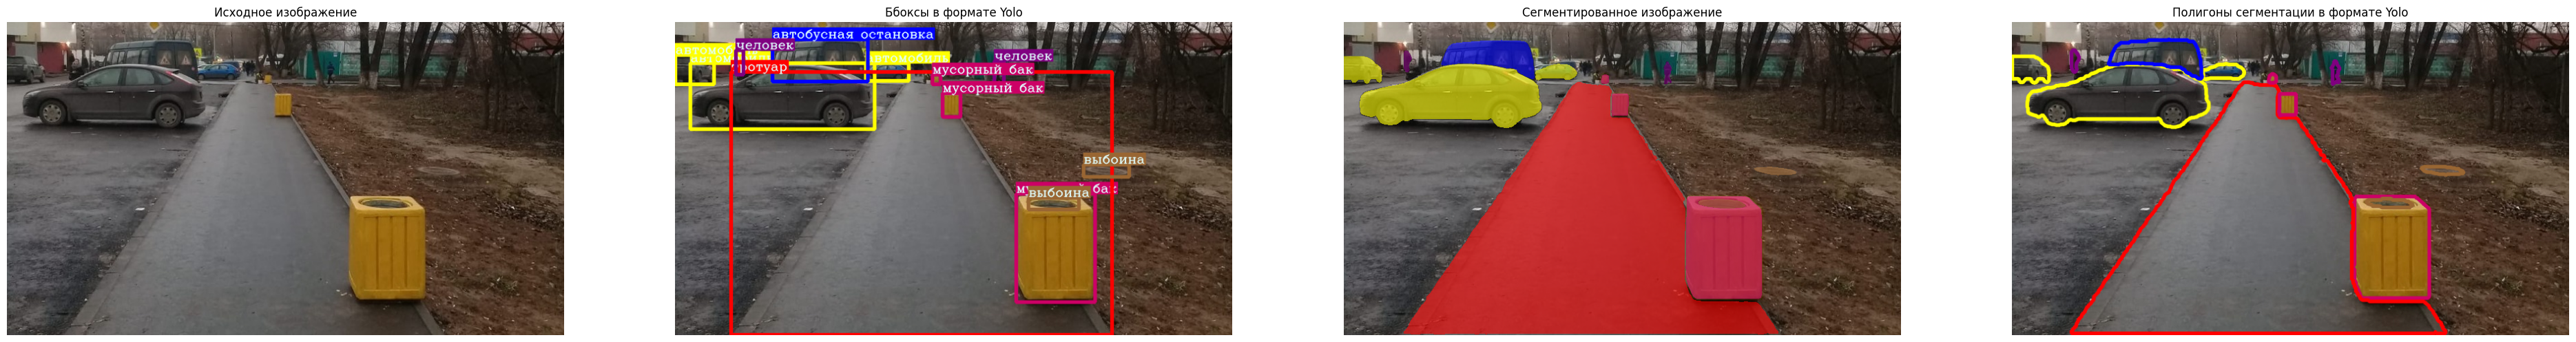

In [ ]:
# путь до изображения
file_path = '/content/urn_1.jpg'

# отрисовка ббоксов, масок и полигонов
bbox_seg_poligon_txt(file_path)

In [ ]:
# получившаяся аннотация для изображения
txt_print(file_path)

Аннотация в формате YOLO для полигонов:
 7 0.6190476190476191 0.5574837310195228 0.6178266178266179 0.559652928416486 0.6166056166056166 0.559652928416486 0.6166056166056166 0.561822125813449 0.6153846153846154 0.5639913232104121 0.6153846153846154 0.6203904555314533 0.6141636141636142 0.6225596529284165 0.6141636141636142 0.7765726681127982 0.612942612942613 0.7787418655097614 0.612942612942613 0.7874186550976139 0.6141636141636142 0.789587852494577 0.6141636141636142 0.8199566160520607 0.6153846153846154 0.8221258134490239 0.6153846153846154 0.8286334056399133 0.6166056166056166 0.8308026030368764 0.6166056166056166 0.8373101952277657 0.6178266178266179 0.8394793926247288 0.6178266178266179 0.8438177874186551 0.6190476190476191 0.8459869848156182 0.6190476190476191 0.8481561822125814 0.6202686202686203 0.8503253796095445 0.6202686202686203 0.8524945770065075 0.6214896214896215 0.8546637744034707 0.6214896214896215 0.8568329718004338 0.6227106227106227 0.8590021691973969 0.62271062271

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


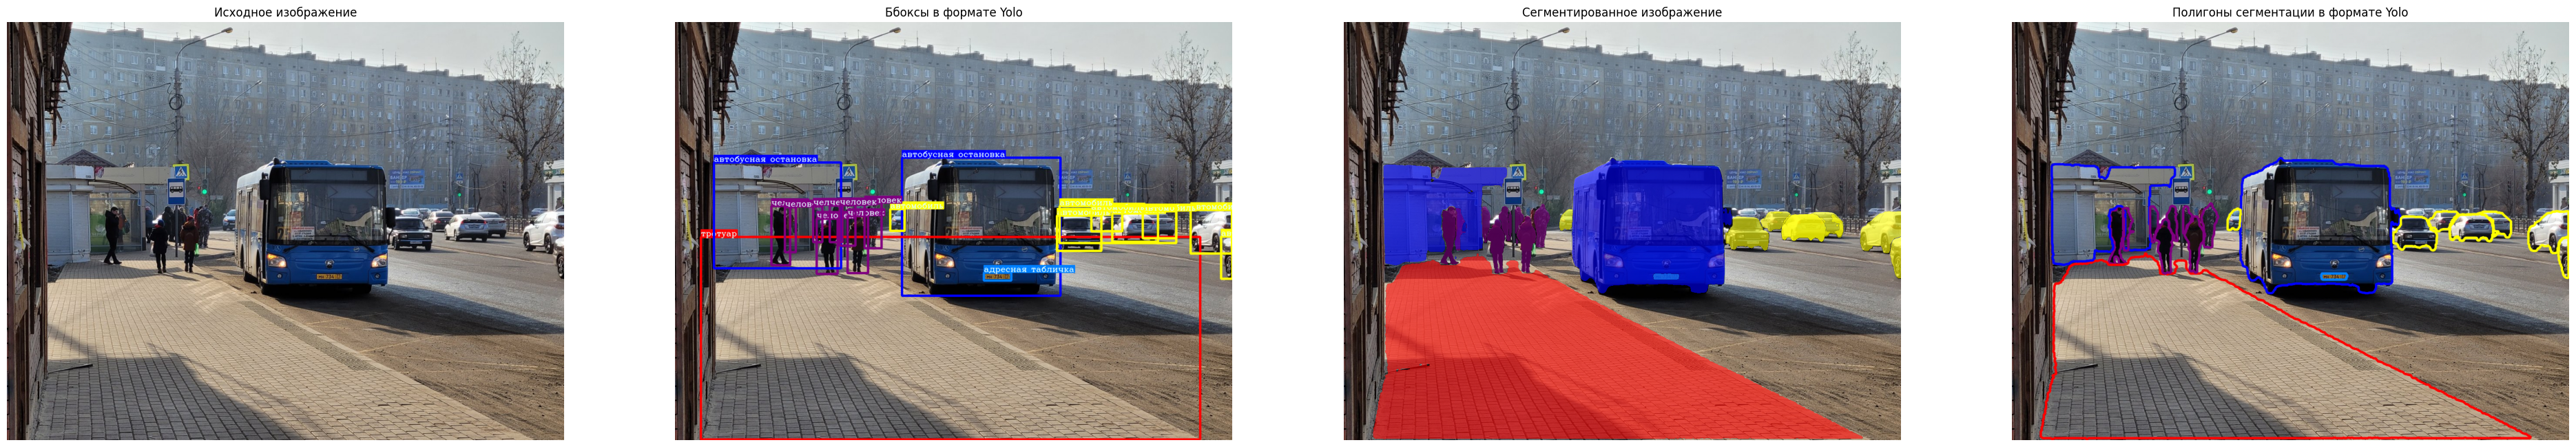

In [ ]:
# путь до изображения
file_path = '/content/bus_2.jpg'

# отрисовка ббоксов, масок и полигонов
bbox_seg_poligon_txt(file_path)

In [ ]:
# получившаяся аннотация для изображения
txt_print(file_path)

Аннотация в формате YOLO для полигонов:
 4 0.48125 0.3260416666666667 0.475 0.334375 0.47421875 0.334375 0.4734375 0.33541666666666664 0.47265625 0.33541666666666664 0.47109375 0.3375 0.4703125 0.3375 0.46953125 0.3385416666666667 0.46875 0.3385416666666667 0.46796875 0.33958333333333335 0.46640625 0.33958333333333335 0.465625 0.340625 0.46484375 0.340625 0.4640625 0.3416666666666667 0.4625 0.3416666666666667 0.46171875 0.34270833333333334 0.4609375 0.34270833333333334 0.46015625 0.34375 0.45859375 0.34375 0.4578125 0.34479166666666666 0.45703125 0.34479166666666666 0.45625 0.3458333333333333 0.45546875 0.3458333333333333 0.4546875 0.346875 0.45390625 0.346875 0.4484375 0.3541666666666667 0.44765625 0.3541666666666667 0.446875 0.35520833333333335 0.44609375 0.35520833333333335 0.4453125 0.35625 0.44453125 0.35625 0.44375 0.3572916666666667 0.4421875 0.3572916666666667 0.44140625 0.35833333333333334 0.440625 0.35833333333333334 0.43984375 0.359375 0.43828125 0.359375 0.4375 0.3604166666

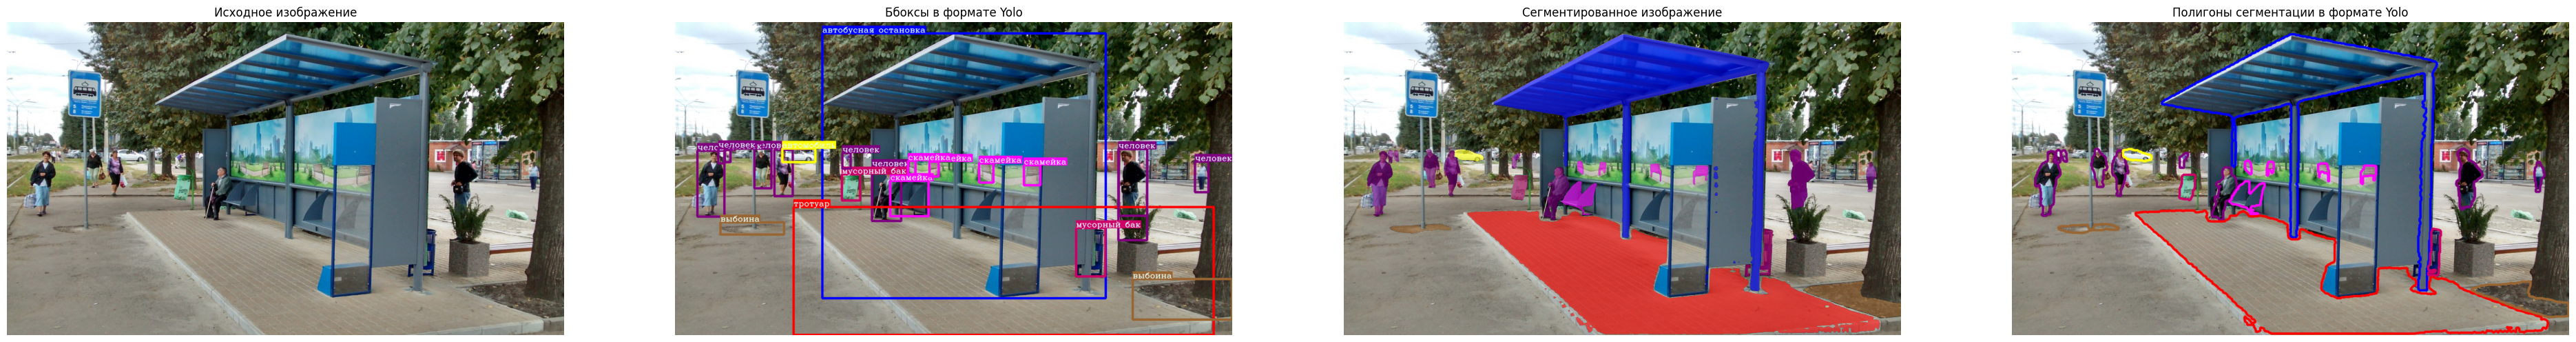

In [ ]:
# путь до изображения
file_path = '/content/bus_stop_2.jpg'

# отрисовка ббоксов, масок и полигонов
bbox_seg_poligon_txt(file_path)

In [ ]:
# получившаяся аннотация для изображения
txt_print(file_path)

Аннотация в формате YOLO для полигонов:
 3 0.06875 0.41307371349095967 0.06796875 0.4144645340751043 0.0671875 0.4144645340751043 0.065625 0.4172461752433936 0.06484375 0.4172461752433936 0.0640625 0.41863699582753827 0.0640625 0.4283727399165508 0.06484375 0.4297635605006954 0.06484375 0.44367176634214184 0.0625 0.4478442280945758 0.06015625 0.4478442280945758 0.059375 0.44923504867872044 0.05859375 0.44923504867872044 0.0578125 0.4506258692628651 0.05703125 0.4506258692628651 0.05546875 0.4534075104311544 0.0546875 0.4534075104311544 0.05390625 0.45479833101529904 0.05390625 0.4561891515994437 0.0515625 0.4603616133518776 0.0515625 0.4617524339360223 0.05078125 0.4631432545201669 0.05078125 0.46453407510431155 0.05 0.4659248956884562 0.05 0.4673157162726008 0.04921875 0.46870653685674546 0.04921875 0.4714881780250348 0.0484375 0.4728789986091794 0.0484375 0.47426981919332406 0.04765625 0.4756606397774687 0.04765625 0.47705146036161333 0.046875 0.47844228094575797 0.046875 0.479833101

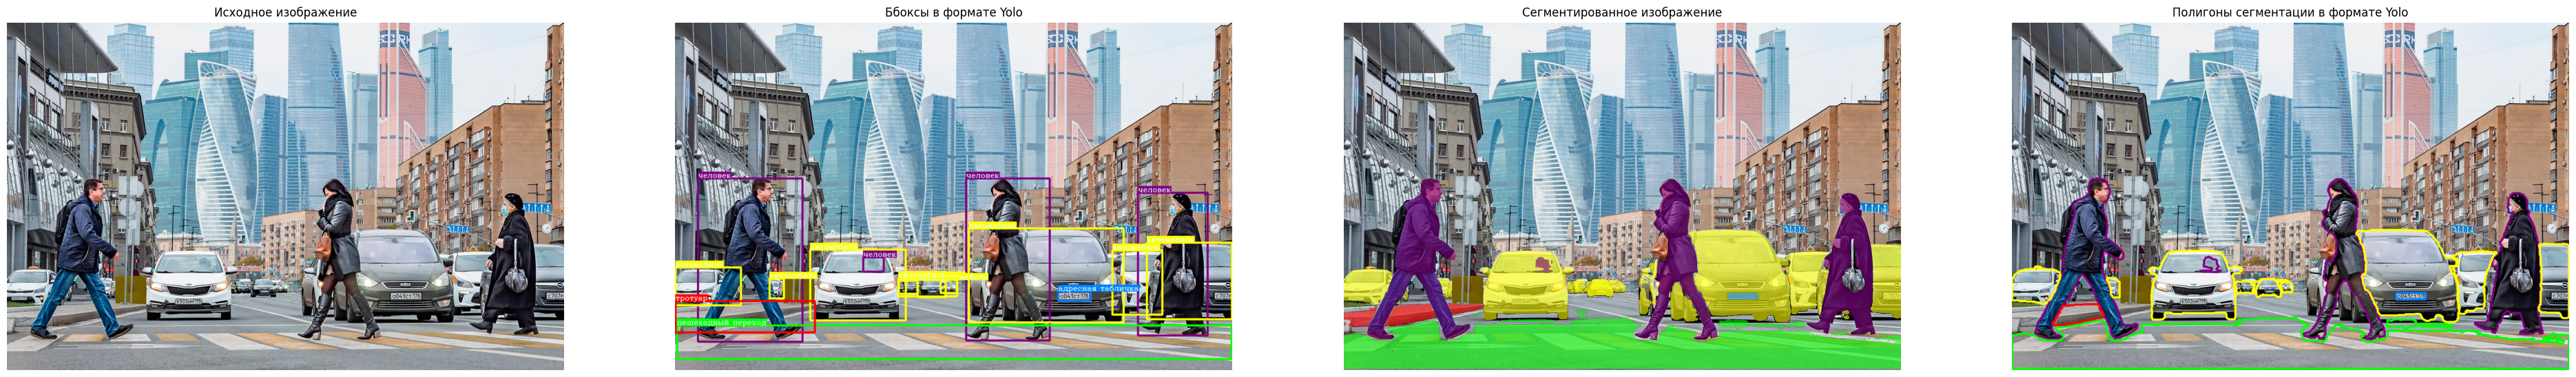

In [ ]:
# путь до изображения
file_path = '/content/person_1.jpg'

# отрисовка ббоксов, масок и полигонов
bbox_seg_poligon_txt(file_path)

In [ ]:
# получившаяся аннотация для изображения
txt_print(file_path)

Аннотация в формате YOLO для полигонов:
 3 0.9020833333333333 0.4911111111111111 0.9013888888888889 0.4922222222222222 0.8993055555555556 0.4922222222222222 0.8979166666666667 0.49444444444444446 0.8972222222222223 0.49444444444444446 0.8951388888888889 0.49777777777777776 0.8951388888888889 0.4988888888888889 0.8944444444444445 0.5 0.8944444444444445 0.5011111111111111 0.8930555555555556 0.5033333333333333 0.8930555555555556 0.5044444444444445 0.8916666666666667 0.5066666666666667 0.8916666666666667 0.51 0.8909722222222223 0.5111111111111111 0.8909722222222223 0.52 0.8902777777777777 0.5211111111111111 0.8902777777777777 0.5222222222222223 0.8909722222222223 0.5233333333333333 0.8909722222222223 0.5288888888888889 0.8902777777777777 0.53 0.8902777777777777 0.5311111111111111 0.8895833333333333 0.5322222222222223 0.8895833333333333 0.5355555555555556 0.8909722222222223 0.5377777777777778 0.8909722222222223 0.5388888888888889 0.8916666666666667 0.54 0.8916666666666667 0.5411111111111111

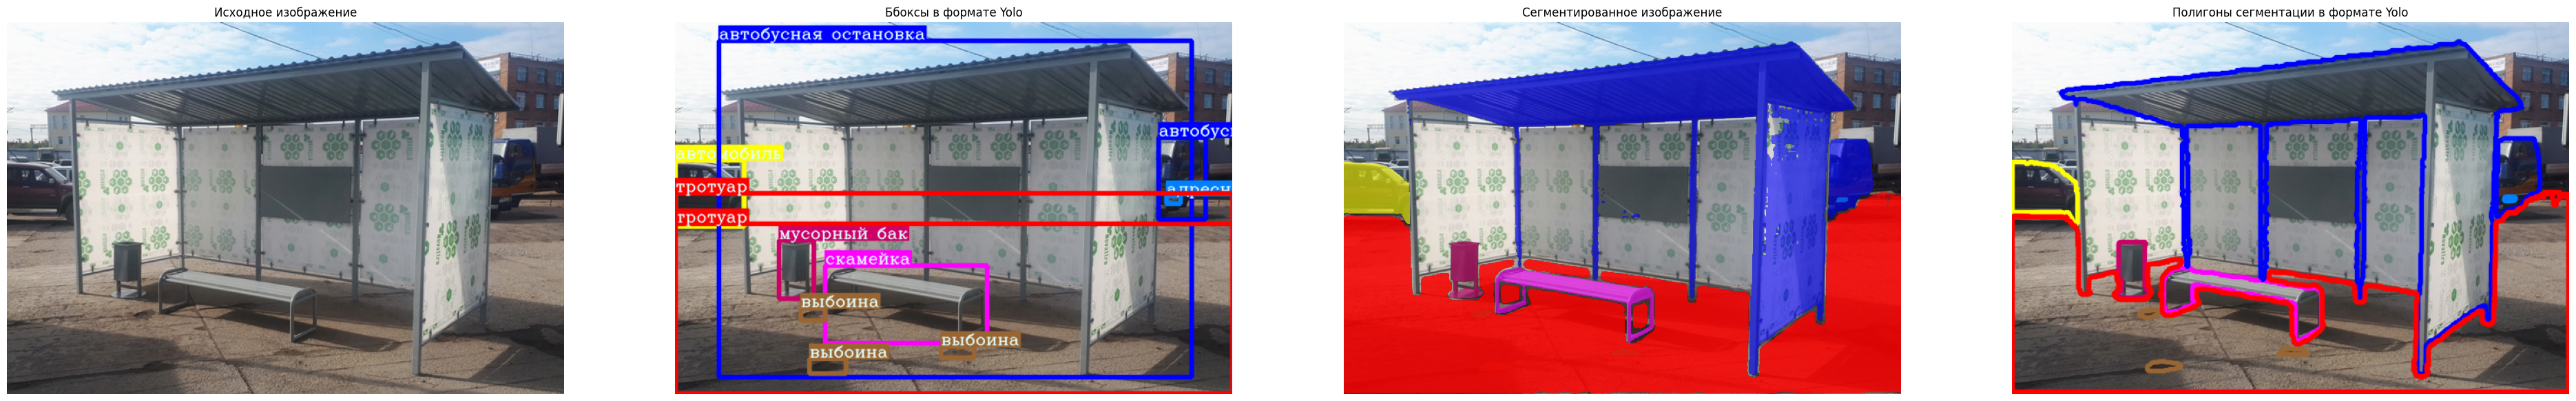

In [ ]:
# путь до изображения
file_path = '/content/urn_7.jpg'

# отрисовка ббоксов, масок и полигонов
bbox_seg_poligon_txt(file_path)

In [ ]:
# получившаяся аннотация для изображения
txt_print(file_path)

Аннотация в формате YOLO для полигонов:
 6 0.30625 0.6604215456674473 0.3046875 0.6627634660421545 0.3 0.6627634660421545 0.2984375 0.6651053864168618 0.290625 0.6651053864168618 0.2890625 0.667447306791569 0.2875 0.667447306791569 0.2859375 0.6697892271662763 0.284375 0.6697892271662763 0.2828125 0.6721311475409836 0.28125 0.6721311475409836 0.275 0.6814988290398126 0.275 0.6838407494145199 0.2734375 0.6861826697892272 0.2734375 0.6908665105386417 0.271875 0.6932084309133489 0.271875 0.7611241217798594 0.2734375 0.7634660421545667 0.2734375 0.7798594847775175 0.275 0.7798594847775175 0.2765625 0.7822014051522248 0.2796875 0.7822014051522248 0.28125 0.7798594847775175 0.290625 0.7798594847775175 0.2921875 0.7775175644028103 0.296875 0.7775175644028103 0.2984375 0.775175644028103 0.3 0.775175644028103 0.3015625 0.7728337236533958 0.303125 0.7728337236533958 0.3046875 0.7704918032786885 0.30625 0.7704918032786885 0.3078125 0.7681498829039812 0.309375 0.7681498829039812 0.3109375 0.765807

Процесс создания аннотаций в формате для YOLO

<div align="center">
  <img
    width="1200"
    src="https://testkub.ru/ml/robot/vse_3_250fps_1200.gif"
  >
</div>

## Несколько классов на видео

1 этап: Алгоритм находит на изображении объекты по промту и выделяет их ограничивающими рамками

<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/moskva_vse_bi_20fps_700.gif"
  >
</div>

2 этап: Алгоритм в пределах ограничивающей рамки выделяет маску

<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/moskva_vse_mi_20fps_700.gif"
  >
</div>

3 этап: Алгоритм переводит маску в полигон

<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/moskva_vse_pi_20fps_700.gif"
  >
</div>

# Результаты дообучения YOLOv8 на датасете

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/statistika.jpg"
  >
</div>

Процесс обучения


<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/process_obuheniy.jpg"
  >
</div>

Результаты обучения

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/confusion_matrix_normalized.png"
  >
</div>

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/confusion_matrix.png"
  >
</div>

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/results.png"
  >
</div>

Тренировочная

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/train_batch20880.jpg"
  >
</div>

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/train_batch20881.jpg"
  >
</div>

Валидационная

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/val_batch1_pred.jpg"
  >
</div>

<div align="center">
  <img
    width="1000"
    src="https://testkub.ru/ml/robot/itogi/val_batch2_labels.jpg"
  >
</div>

# Трекинг встроенный в Yolov8

>ВНИМАНИЕ!!! Перед следующей ячейкой перезапустите среду выполнения или удалите среду выполнения и снова подключитесь. Иначе может возникнуть ошибка, свазаная с несовместимостью версии ultralytics






In [ ]:
#@title Библиотеки
!pip install ultralytics
#!pip install ultralytics==8.0.87
#!pip install lap==0.4.0


import cv2
import os
import gdown
import zipfile
import moviepy
from moviepy.editor import *
from moviepy.editor import VideoFileClip
from IPython.display import display, clear_output

from ultralytics import YOLO

def load_video_i(url):
    output = "video.zip"

    # Проверяем, существует ли архив ves.zip
    if os.path.exists(output):
        # Если архив существует, удаляем его
        os.remove(output)

    # Скачиваем zip архив
    gdown.download(url, output, quiet=False)

    # Распаковываем архив в текущую директорию
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall()


def load_weights(url):
    output = "ves.zip"

    # Проверяем, существует ли архив ves.zip
    if os.path.exists(output):
        # Если архив существует, удаляем его
        os.remove(output)

    # Скачиваем zip архив
    gdown.download(url, output, quiet=False)

    # Распаковываем архив в текущую директорию
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 7.5 MB/s eta 0:00:00


Загрузка видео и нашей модели

In [ ]:
# Загрузка видео для детектирования
url = "https://drive.google.com/uc?id=1-kACd-pNz6EuhJVMfEK5MnT306z5jGj9"
load_video_i(url)

# Загрузка видео для детектирования
url = "https://drive.google.com/uc?id=1vK7uV76ef2AVrImxpbKj4LMw3SvCq86r"
load_video_i(url)

# Загрузка весов нашей модели
url = "https://drive.google.com/uc?id=1XW7oKz3zAy0ayoJTuuTvJrZUqIJkFBwc"
load_weights(url)

<h3>Трекинг на нашей модели</h3>

**Botsort**

In [ ]:
model = YOLO("/content/model_vse_4000/best.pt")
results = model.track(
    source="/content/traffic.mp4",
    conf=0.25, # порог достоверности объекта для обнаружения
    iou=0.7, # порог пересечения через объединение
    tracker="botsort.yaml",  #трекер BoT-SORT
    save=True # нужно ли сохранять результаты обработки видео в файл
)

*Готовый видеофайл с трекингом можно скачать из папки `runs/detect/track` на виртуальнй машине гугл колаба*

Результат

<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/itogi/trafik_trek_botsort.gif"
  >
</div>

<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/itogi/trafik_trek2_botsort.gif"
  >
</div>

**Bytetrack**

In [ ]:
model = YOLO("/content/model_vse_4000/best.pt")
results = model.track(
    source="/content/IMG_20231028_151652_597.mp4",
    conf=0.25, # порог достоверности объекта для обнаружения
    iou=0.7, # порог пересечения через объединение
    tracker="bytetrack.yaml",  # трекер bytetrack
    save=True # нужно ли сохранять результаты обработки видео в файл
)

*Готовый видеофайл с трекингом можно скачать из папки `runs` на виртуальнй машине гугл колаба*

Результат:


<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/itogi/trafik_trek_bytetrack.gif"
  >
</div>


<div align="center">
  <img
    width="700"
    src="https://testkub.ru/ml/robot/itogi/trafik_trek2_bytetrack.gif"
  >
</div>